Importando librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report

usar el cierre
graficarla c/r a las fechas
hacer un regresor según la fecha para el cierre (KNN y lineal)
gráficarlas


In [3]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_6/Data/bancos.csv'
data=pd.read_csv(archivo)
data


,Empresa,Fecha,Apertura,Máximo,Mínimo,Cierre,Volumen
0,Banco Sabadell,2021-04-01,0.4591,0.4591,0.4445,0.4553,30084389
1,Banco Sabadell,2021-04-06,0.4630,0.4778,0.4581,0.4656,44336977
2,Banco Sabadell,2021-04-07,0.4650,0.4705,0.4626,0.4673,22517116
3,Banco Sabadell,2021-04-08,0.4662,0.4695,0.4536,0.4607,30800345
4,Banco Sabadell,2021-04-09,0.4607,0.4644,0.4512,0.4600,35703383
...,...,...,...,...,...,...,...
97,Caixabank,2021-04-26,2.5000,2.5530,2.4670,2.5470,18930563
98,Caixabank,2021-04-27,2.5600,2.6170,2.5270,2.6060,11769775
99,Caixabank,2021-04-28,2.6200,2.6430,2.5770,2.6170,11811235
100,Caixabank,2021-04-29,2.6290,2.6860,2.6030,2.6570,15696456


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Empresa   102 non-null    object 
 1   Fecha     102 non-null    object 
 2   Apertura  102 non-null    float64
 3   Máximo    102 non-null    float64
 4   Mínimo    102 non-null    float64
 5   Cierre    102 non-null    float64
 6   Volumen   102 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 5.7+ KB


No hay nulos
Haciendo el filtro por el banco BBVA

In [5]:
filtro_bbva=data.loc[data['Empresa']=='BBVA',:]
filtro_bbva

,Empresa,Fecha,Apertura,Máximo,Mínimo,Cierre,Volumen
61,BBVA,2021-04-01,5.24,5.26,5.21,5.25,1612300
62,BBVA,2021-04-05,5.30,5.34,5.29,5.33,949300
63,BBVA,2021-04-06,5.39,5.41,5.34,5.36,1358500
64,BBVA,2021-04-07,5.37,5.41,5.35,5.41,1349700
65,BBVA,2021-04-08,5.32,5.43,5.29,5.42,1153800
66,BBVA,2021-04-09,5.30,5.33,5.26,5.30,2514600
67,BBVA,2021-04-12,5.31,5.35,5.30,5.33,1065900
68,BBVA,2021-04-13,5.28,5.31,5.24,5.29,919600
69,BBVA,2021-04-14,5.30,5.37,5.30,5.35,973300
70,BBVA,2021-04-15,5.31,5.32,5.19,5.23,1912200


Transformando a tipo fecha la columna de fecha

In [6]:
filtro_bbva['Fecha'] = pd.to_datetime(filtro_bbva['Fecha'])

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_4575/3570039611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_bbva['Fecha'] = pd.to_datetime(filtro_bbva['Fecha'])


In [7]:
filtro_bbva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 61 to 81
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Empresa   21 non-null     object        
 1   Fecha     21 non-null     datetime64[ns]
 2   Apertura  21 non-null     float64       
 3   Máximo    21 non-null     float64       
 4   Mínimo    21 non-null     float64       
 5   Cierre    21 non-null     float64       
 6   Volumen   21 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.3+ KB


In [8]:
filtro_bbva['Day']=filtro_bbva['Fecha'].dt.day

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_4575/631742958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_bbva['Day']=filtro_bbva['Fecha'].dt.day


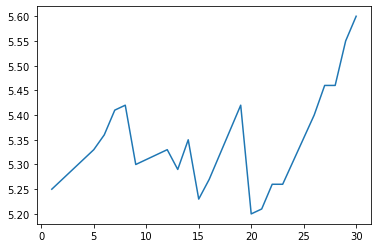

In [9]:
plt.plot(filtro_bbva['Day'],filtro_bbva['Cierre'])

Creando los regresores

Con KNN

In [67]:
X = filtro_bbva.drop(columns=['Empresa','Fecha','Cierre']) # Separación de las características
y = filtro_bbva['Cierre'] # Separación del target (corresponde a lo que quiero predecir)

In [86]:
r2=0
count=0

while (r2<=0.90):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    knn = KNeighborsRegressor(n_neighbors=3)
    knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
    y_pred_knn=knn.predict(X_test)
    r2=r2_score(y_test, y_pred_knn)
    count+=1
    print(r2)
print(count)

0.5567279434752724
0.33822222222222487
0.823548311718658
0.7974247624384219
0.683903133903135
0.807180916067853
0.6029138251704891
0.7462753545144507
0.7702505028341564
0.8354289035731777
0.254861111111111
0.6248271092669431
0.8506228029955674
0.13983050847457357
0.8165338875418535
0.608924038273771
0.5501195695496203
0.7173466769309741
0.7915709868038353
0.5123656882165808
0.7216712580348917
0.7743889249405164
0.004675467546757184
0.8188097082365107
0.8095944609297734
0.4193376068375999
0.7583008718234108
0.5665460394049047
0.884277386235099
0.47785285285285006
0.9154645229967342
31


In [84]:
r2=0
count=0
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
for i in range (1, len(X_train)):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
    y_pred_knn=knn.predict(X_test)
    r2=r2_score(y_test, y_pred_knn)
    print("Con n vecinos =",i)
    print("R2=",r2)


Con n vecinos = 1
R2= 0.656811377245513
Con n vecinos = 2
R2= 0.7517776946107797
Con n vecinos = 3
R2= 0.8433965402528246
Con n vecinos = 4
R2= 0.8061377245508947
Con n vecinos = 5
R2= 0.664146706586821
Con n vecinos = 6
R2= 0.543288423153688
Con n vecinos = 7
R2= 0.3180603079555129
Con n vecinos = 8
R2= 0.3454692178143668
Con n vecinos = 9
R2= 0.24657629186072016
Con n vecinos = 10
R2= 0.027597305389213567
Con n vecinos = 11
R2= -0.039568590092553535
Con n vecinos = 12
R2= -0.2052171698270162
Con n vecinos = 13
R2= -0.45243241327994865


Con regresor lineal

In [87]:
r2=0
count=0
 # Separación del target (corresponde a lo que quiero predecir)
while (r2<=0.90):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
    lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
    lin_reg.fit(X_train,y_train)
    y_pred=lin_reg.predict(X_test)
    r2=r2_score(y_test, y_pred)
    count+=1
    print(r2)
print(count)

0.8045832803286417
0.8922662240324343
0.9476673721581407
3


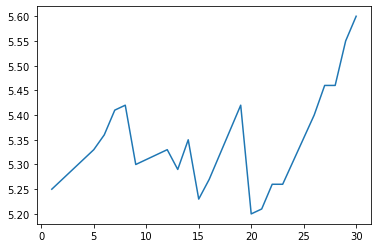

In [56]:
plt.plot(filtro_bbva['Day'],filtro_bbva['Cierre'])
#plt.plot(filtro_bbva['Day'])
#plt.plot(filtro_bbva['Day'],knn.predict(X_test))

In [73]:
knn.predict(X_test)

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


array([5.44, 5.44, 5.44, 5.44, 5.44, 5.44, 5.44])

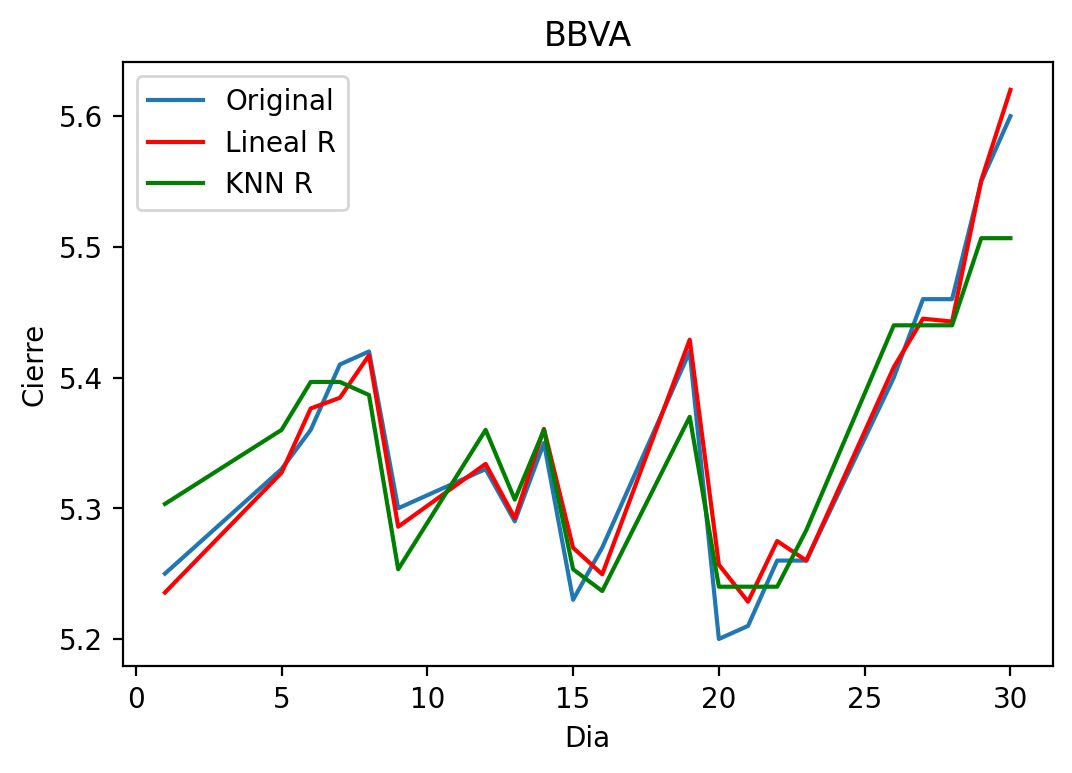

In [88]:
plt.figure(dpi=200)
plt.plot(X['Day'],filtro_bbva['Cierre'], markerfacecolor="#ff0000", label="Original")
plt.plot(X['Day'],lin_reg.predict(X),color='r', markerfacecolor="#ff0000", label="Lineal R")
plt.plot(X['Day'],knn.predict(scaler.transform(X)),color='g', markerfacecolor="#ff0000",label= "KNN R")
plt.xlabel('Dia')
plt.ylabel('Cierre')
plt.title('BBVA')
plt.legend(loc="upper left")
plt.show()

---
ahora vamos a trabajar arboles de decision para traer el data set del vino

In [91]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

wine = load_wine()
X = wine.data[:, 0:2 ] # Solo columnas de largo y ancho del pétalo
y = wine.target
X

array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59],
       [14.2 ,  1.76],
       [14.39,  1.87],
       [14.06,  2.15],
       [14.83,  1.64],
       [13.86,  1.35],
       [14.1 ,  2.16],
       [14.12,  1.48],
       [13.75,  1.73],
       [14.75,  1.73],
       [14.38,  1.87],
       [13.63,  1.81],
       [14.3 ,  1.92],
       [13.83,  1.57],
       [14.19,  1.59],
       [13.64,  3.1 ],
       [14.06,  1.63],
       [12.93,  3.8 ],
       [13.71,  1.86],
       [12.85,  1.6 ],
       [13.5 ,  1.81],
       [13.05,  2.05],
       [13.39,  1.77],
       [13.3 ,  1.72],
       [13.87,  1.9 ],
       [14.02,  1.68],
       [13.73,  1.5 ],
       [13.58,  1.66],
       [13.68,  1.83],
       [13.76,  1.53],
       [13.51,  1.8 ],
       [13.48,  1.81],
       [13.28,  1.64],
       [13.05,  1.65],
       [13.07,  1.5 ],
       [14.22,  3.99],
       [13.56,  1.71],
       [13.41,  3.84],
       [13.88,  1.89],
       [13.

[Text(0.5, 0.8333333333333334, 'alcohol <= 12.78\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]\nclass = class_1'),
 Text(0.25, 0.5, 'malic_acid <= 2.96\ngini = 0.256\nsamples = 73\nvalue = [0, 62, 11]\nclass = class_1'),
 Text(0.125, 0.16666666666666666, 'gini = 0.128\nsamples = 58\nvalue = [0, 54, 4]\nclass = class_1'),
 Text(0.375, 0.16666666666666666, 'gini = 0.498\nsamples = 15\nvalue = [0, 8, 7]\nclass = class_1'),
 Text(0.75, 0.5, 'malic_acid <= 2.235\ngini = 0.553\nsamples = 105\nvalue = [59, 9, 37]\nclass = class_0'),
 Text(0.625, 0.16666666666666666, 'gini = 0.311\nsamples = 61\nvalue = [50, 7, 4]\nclass = class_0'),
 Text(0.875, 0.16666666666666666, 'gini = 0.394\nsamples = 44\nvalue = [9, 2, 33]\nclass = class_2')]

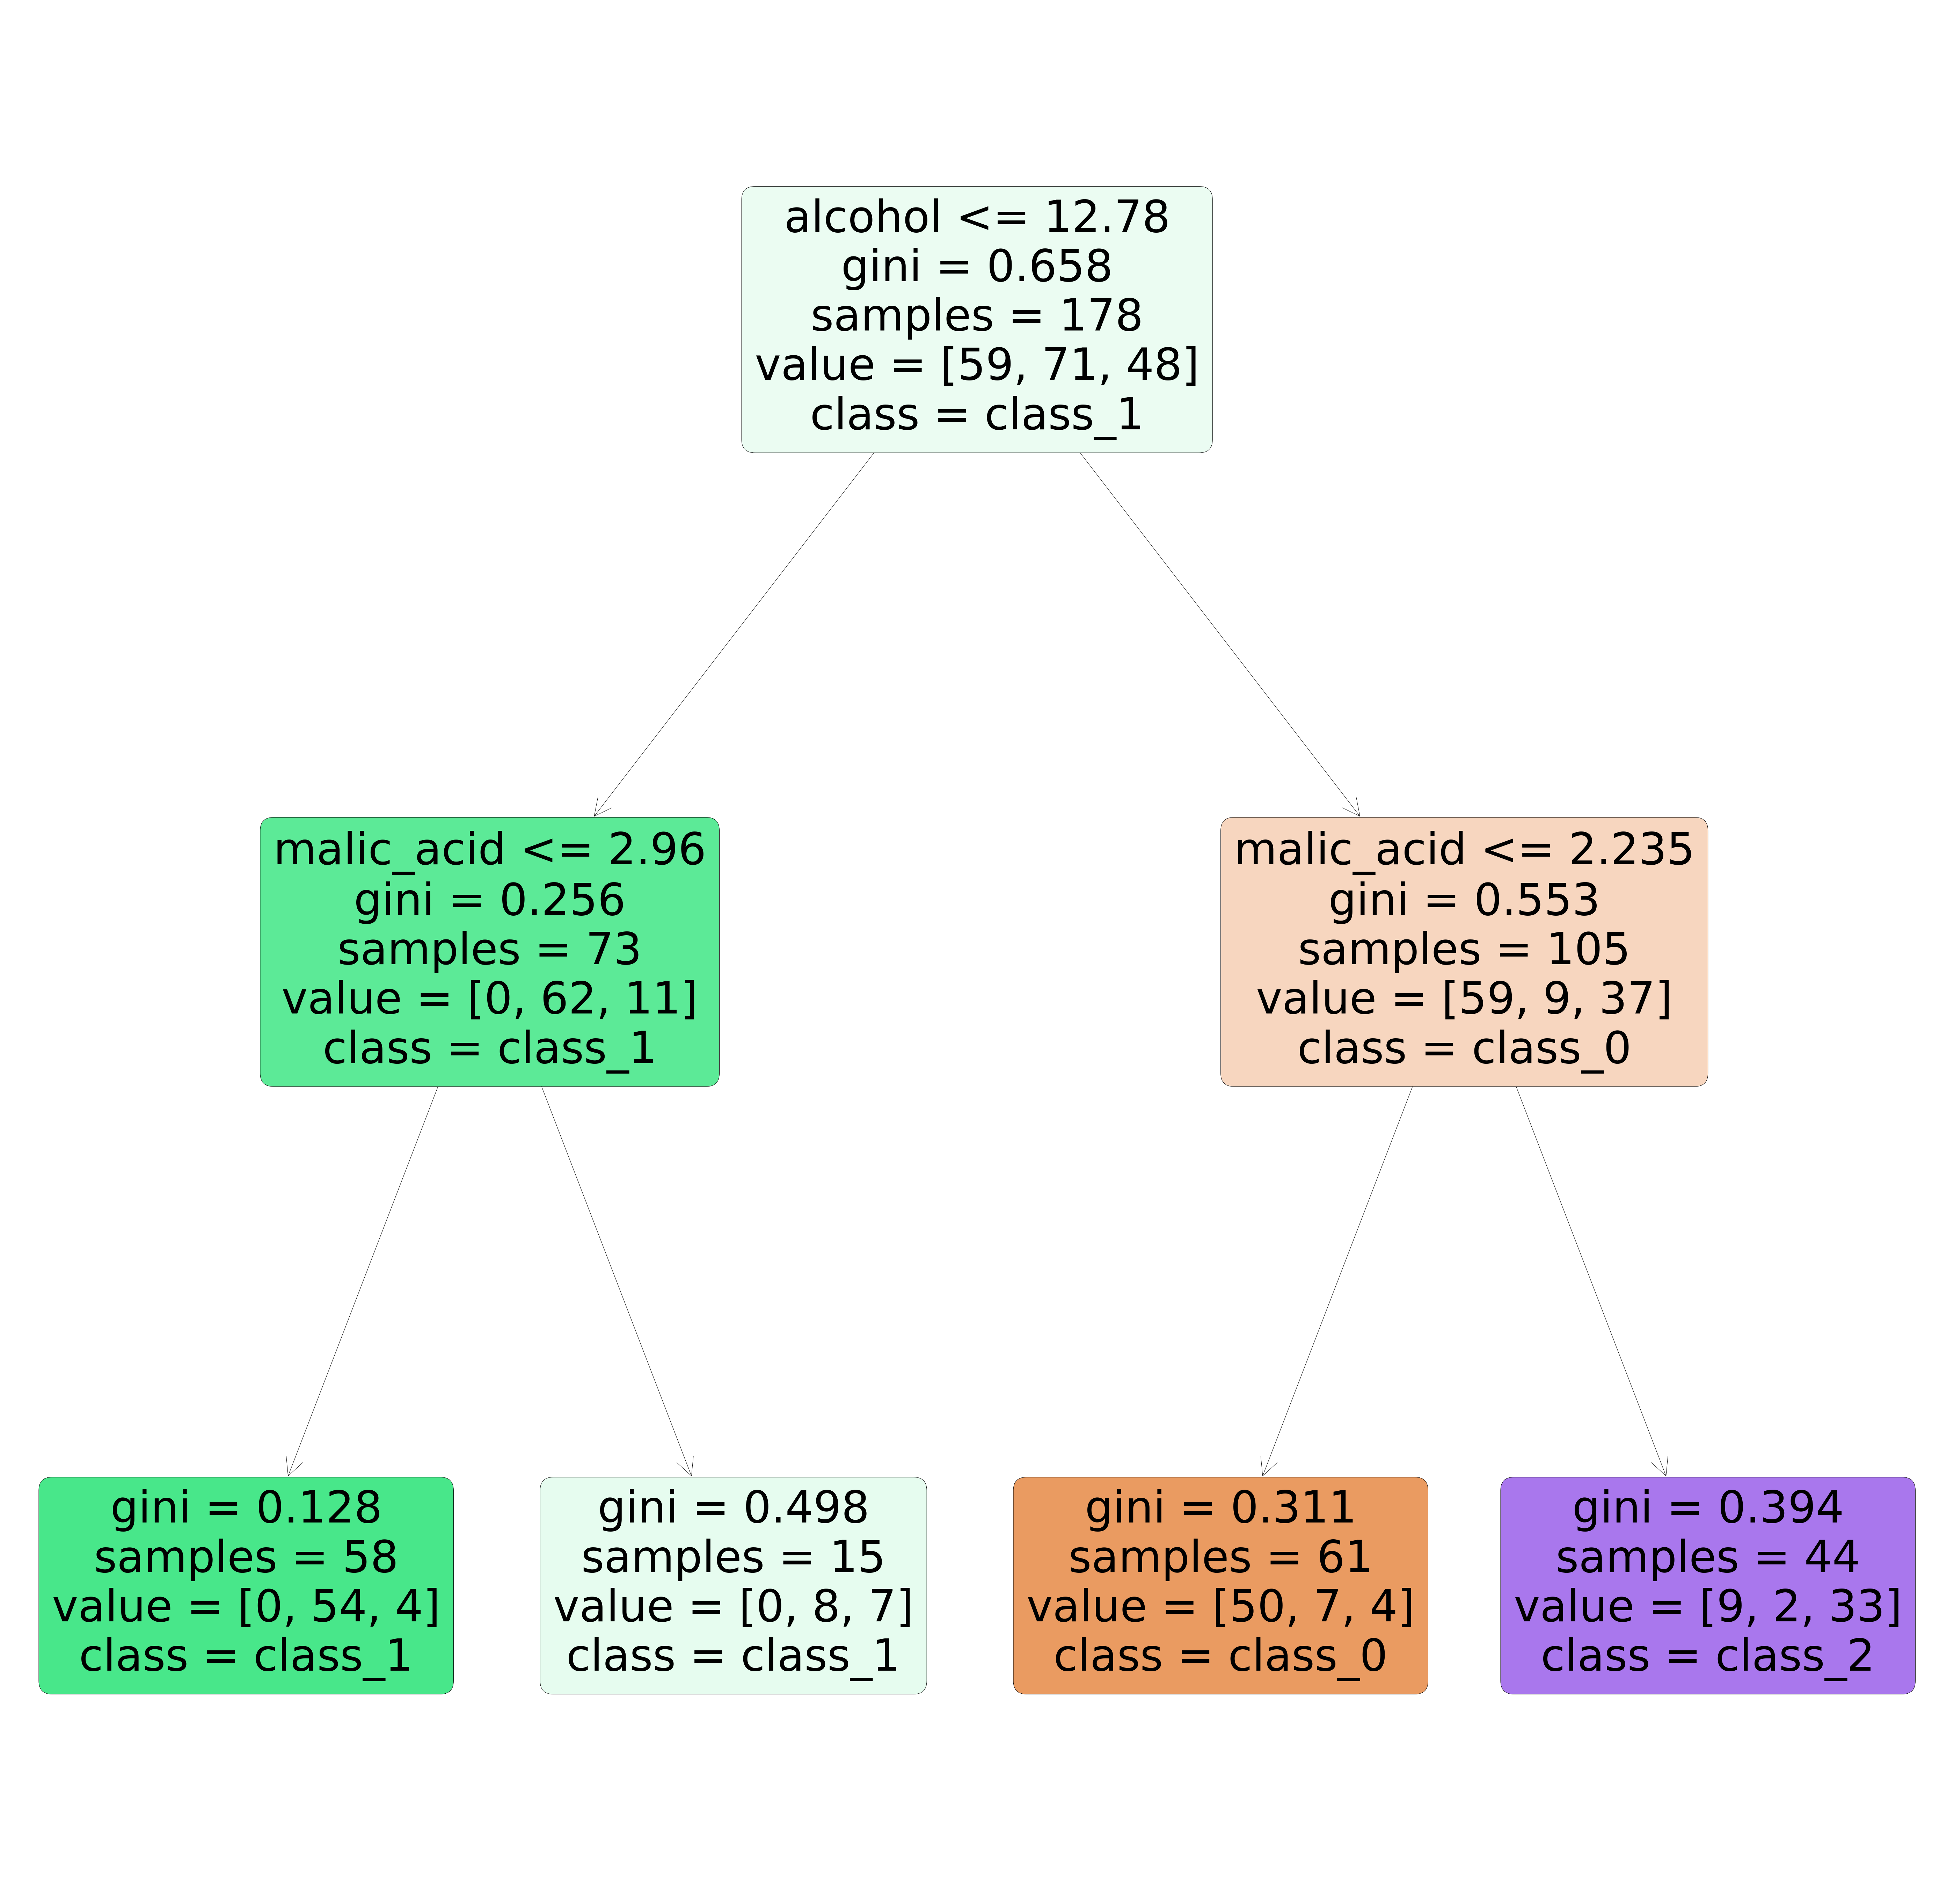

In [92]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)
# Visualizando árbol de decisión
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,100))
tree.plot_tree(
    tree_clf,
    feature_names=wine.feature_names[0:2],
    class_names=wine.target_names,
    rounded=True,
    filled=True
)

Con todas las caracteristicas

In [93]:
X = wine.data # Solo columnas de largo y ancho del pétalo
y = wine.target
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

[Text(0.5657894736842105, 0.9166666666666666, 'proline <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]\nclass = class_1'),
 Text(0.34210526315789475, 0.75, 'od280/od315_of_diluted_wines <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]\nclass = class_1'),
 Text(0.21052631578947367, 0.5833333333333334, 'hue <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]\nclass = class_2'),
 Text(0.10526315789473684, 0.4166666666666667, 'flavanoids <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = class_2'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]\nclass = class_2'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = class_1'),
 Text(0.3157894736842105, 0.4166666666666667, 'color_intensity <= 5.815\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]\nclass = class_1'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]\nclass = class_1'),
 Text(0.3684210526315789, 0.2

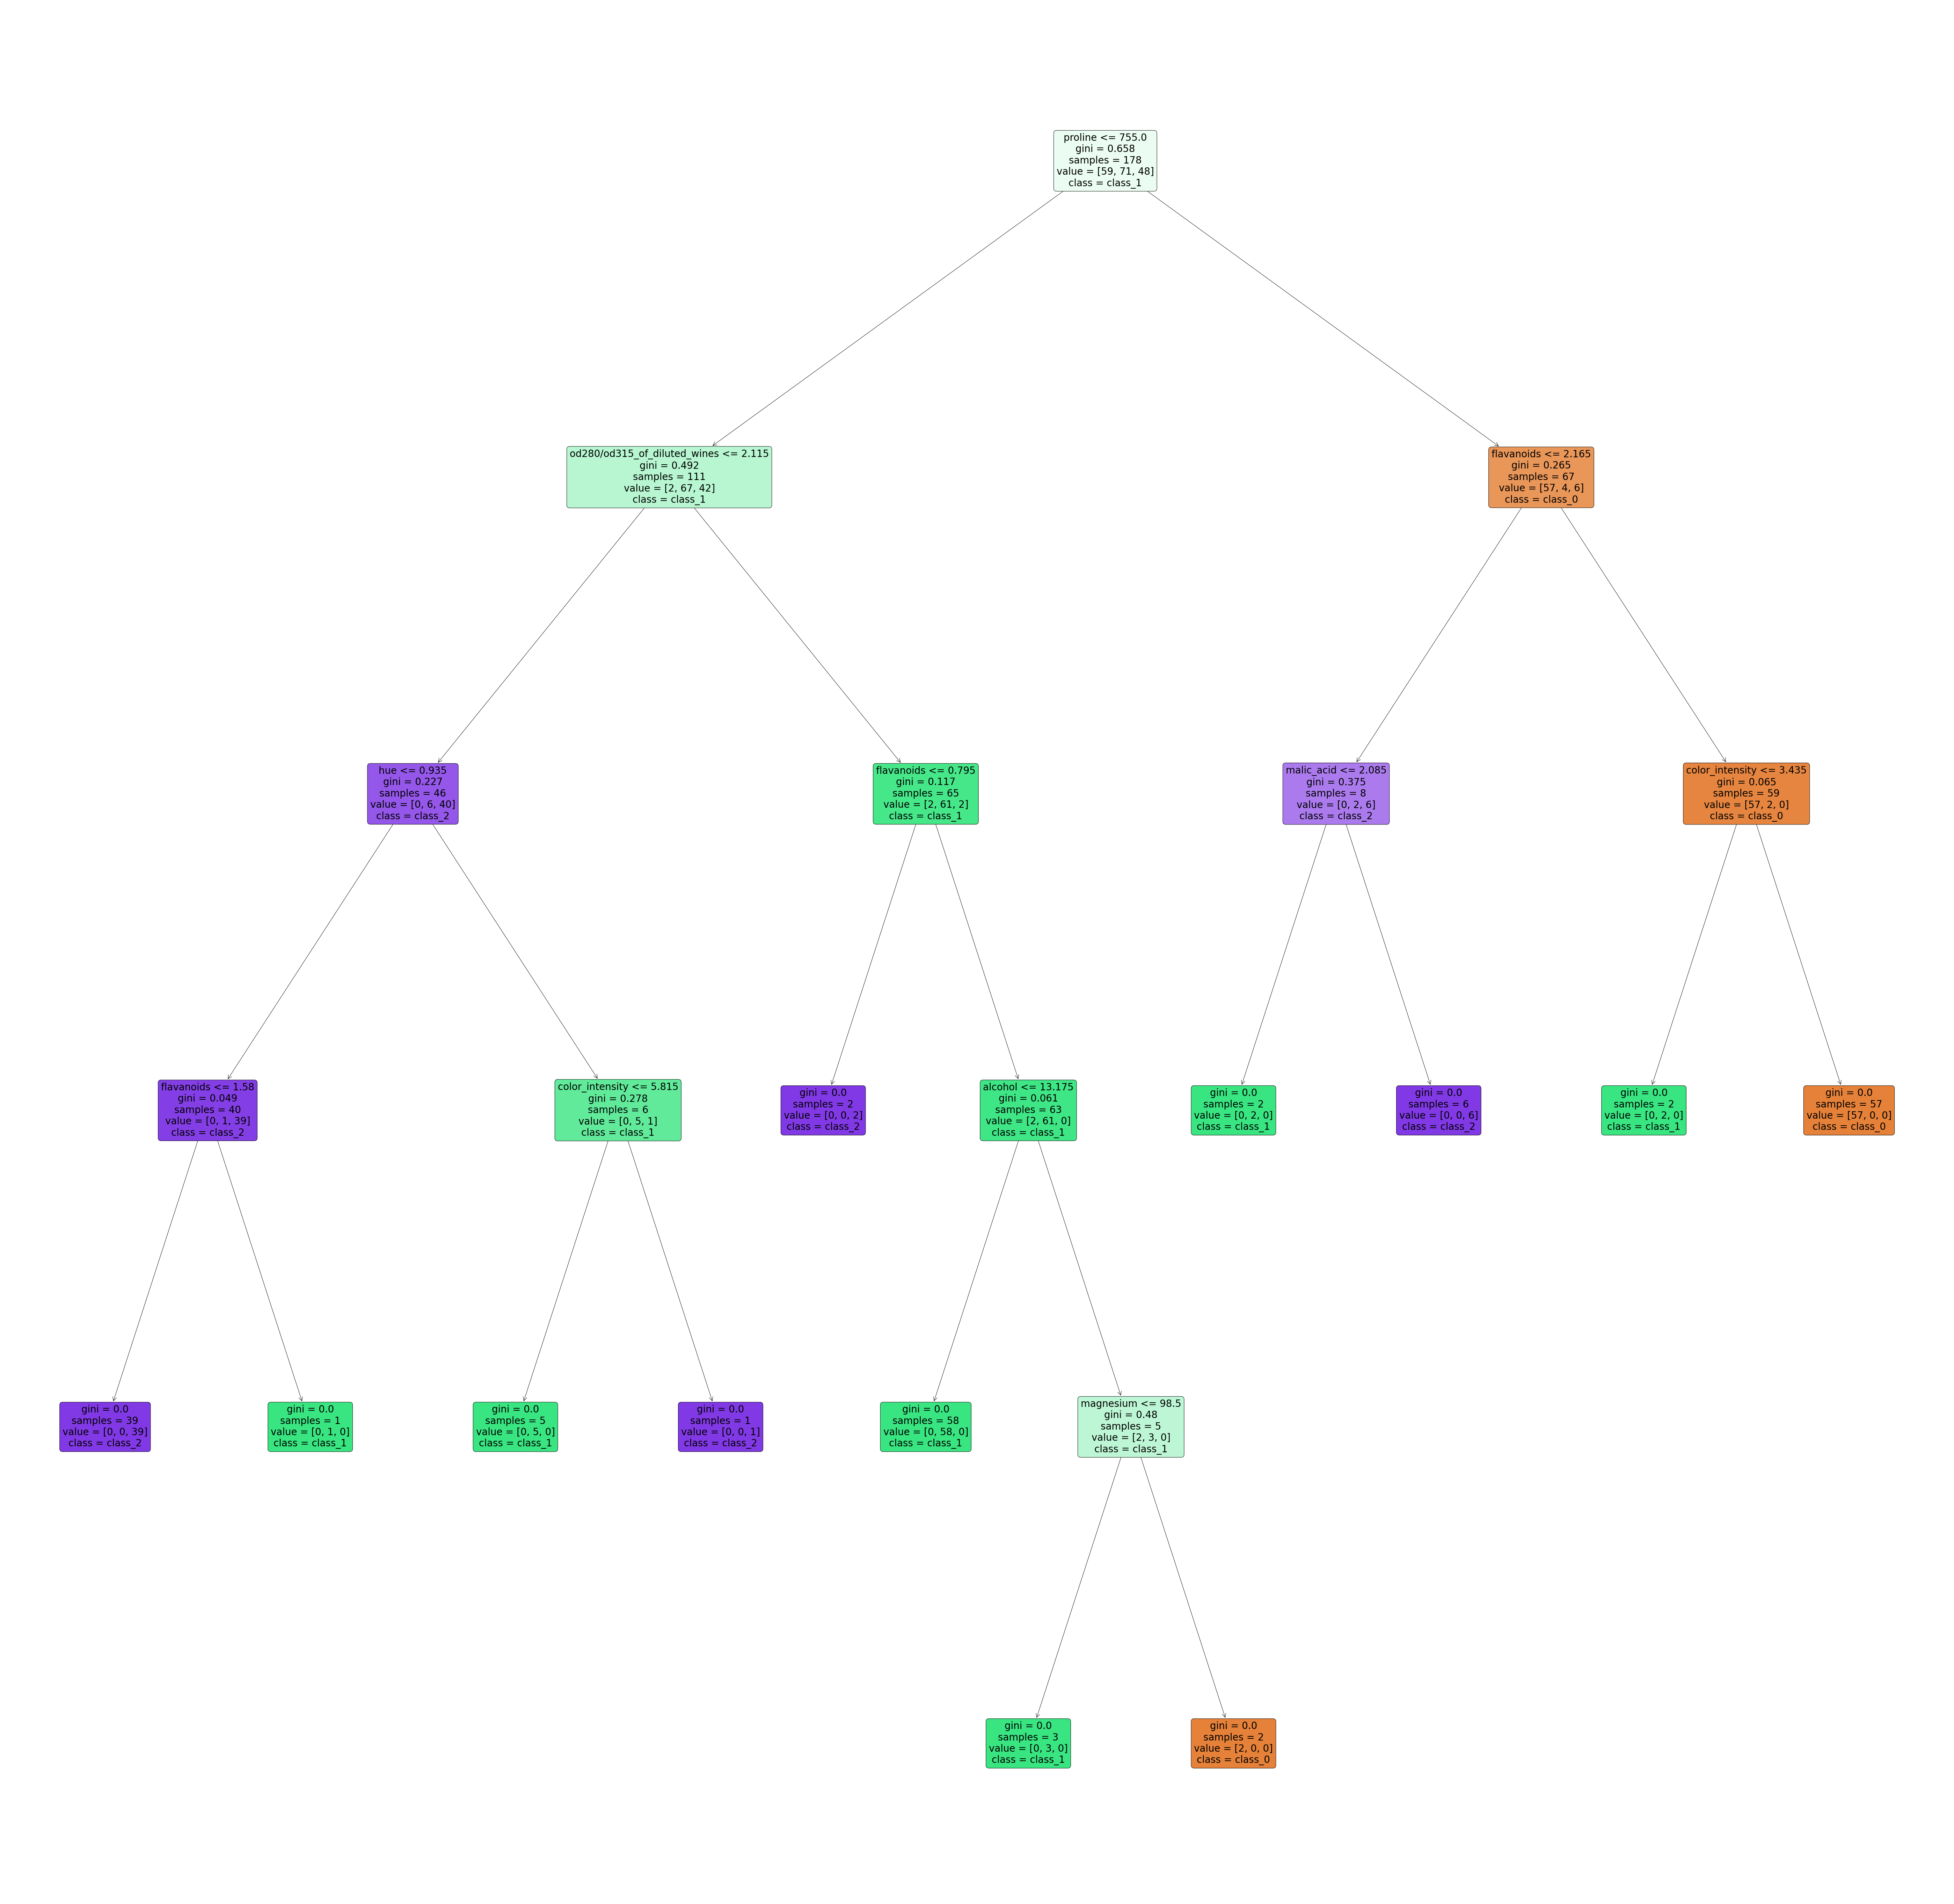

In [96]:
tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X, y)
# Visualizando árbol de decisión
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,100))
tree.plot_tree(
    tree_clf,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    rounded=True,
    filled=True
)

Ahora se trabaja con el segundo intento de la prueba para crear 2 clasificadores que nos permitan saber si es cancelada o no

---
generando los regresores para la data de housing
sin optimización (sin validación)
variable a realizar el regresor
price

La libreria

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

In [97]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_5/Data/housing.csv'
data=pd.read_csv(archivo)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [99]:
dummies=pd.get_dummies(data=data,columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])
dummies

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


Generando los regresores

los X

In [100]:
X = dummies.drop(columns=['price']) # Separación de las características
y = dummies['price'] # Separación del target (corresponde a lo que quiero predecir)

lineal

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)
r2=r2_score(y_test, y_pred)
print(r2)


0.711907599406377


knn

In [107]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
for i in range (1, len(X_train)):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
    y_pred_knn=knn.predict(X_test)
    r2=r2_score(y_test, y_pred_knn)
    print("Con n vecinos =",i)
    print("R2=",r2)


Con n vecinos = 1
R2= 0.23224770966891717
Con n vecinos = 2
R2= 0.36667096168654423
Con n vecinos = 3
R2= 0.5001535669417763
Con n vecinos = 4
R2= 0.5738190644931137
Con n vecinos = 5
R2= 0.5745192882760792
Con n vecinos = 6
R2= 0.5761839678873804
Con n vecinos = 7
R2= 0.5916993715140544
Con n vecinos = 8
R2= 0.6096260332371514
Con n vecinos = 9
R2= 0.6021809085914005
Con n vecinos = 10
R2= 0.5968745202545178
Con n vecinos = 11
R2= 0.5991965828197678
Con n vecinos = 12
R2= 0.5964196012980694
Con n vecinos = 13
R2= 0.5920379227222488
Con n vecinos = 14
R2= 0.5985418651399901
Con n vecinos = 15
R2= 0.5988248744982794
Con n vecinos = 16
R2= 0.5982632917014326
Con n vecinos = 17
R2= 0.6023675048978551
Con n vecinos = 18
R2= 0.5968973942309523
Con n vecinos = 19
R2= 0.5971945979398761
Con n vecinos = 20
R2= 0.5991631122970704
Con n vecinos = 21
R2= 0.5989005491227632
Con n vecinos = 22
R2= 0.5972709663068669
Con n vecinos = 23
R2= 0.5994519898084028
Con n vecinos = 24
R2= 0.5936364130267886

Decision tree

In [128]:
from sklearn.tree import DecisionTreeRegressor
for i in range (1, len(dummies.columns)):
    regressor = DecisionTreeRegressor(max_depth=i)
    regressor.fit(X_train, y_train)
    y_pred_tree=regressor.predict(X_test)
    r2=r2_score(y_test, y_pred_tree)
    print("Con i parametros =",i)
    print("R2=",r2)

Con i parametros = 1
R2= 0.3194159193660179
Con i parametros = 2
R2= 0.4036027871285853
Con i parametros = 3
R2= 0.472218244905125
Con i parametros = 4
R2= 0.5081326548659231
Con i parametros = 5
R2= 0.47110906200298885
Con i parametros = 6
R2= 0.4851225884509207
Con i parametros = 7
R2= 0.49087911706897014
Con i parametros = 8
R2= 0.4540740070397016
Con i parametros = 9
R2= 0.403799474179378
Con i parametros = 10
R2= 0.3924378521213734
Con i parametros = 11
R2= 0.37660554064809093
Con i parametros = 12
R2= 0.39993253264464534
Con i parametros = 13
R2= 0.3497541188385226
Con i parametros = 14
R2= 0.34924498842837504
Con i parametros = 15
R2= 0.39120641233419584
Con i parametros = 16
R2= 0.3851840881634446
Con i parametros = 17
R2= 0.3706042204883172
Con i parametros = 18
R2= 0.35958217785172164
Con i parametros = 19
R2= 0.32637045521166663
Con i parametros = 20
R2= 0.3700697693764151


Dentro de las tres formas de regresion podemos ver que el r2 varia c/r a los modelos, donde en resumen se puede ver que:
- Regresion: 71%
- knn:60,9% con 8 vecinos más cercanos
- decision tree: 50% con 4 de maxima profundidad
puede ser que el decision tree sea bajo porque las variables categoricas al pasarlas a dummies se haya perdido la forma de "categoria", haciendo que la forma de decision sea menos imprecisa
Por lo que generar los dummies es lo menos correcto, lo ideal es que cuando sean tres o mas sea dummie y en otro caso, que sea solo 0 y 1

---
ejercicio con la data de australia
clase 3 semana 5

In [129]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_5/Data/weatherAUS.csv'
australia_temp=pd.read_csv(archivo)

In [130]:
australia_temp

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [131]:
australia_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [132]:
australia_temp['Location'].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [133]:
Melbourne=australia_temp.loc[australia_temp['Location']=='Melbourne',:]
Melbourne

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70388,2017-06-21,Melbourne,7.8,13.5,0.6,0.6,0.0,NNW,24.0,W,...,100.0,80.0,1028.8,1028.4,7.0,7.0,11.2,12.7,No,No
70389,2017-06-22,Melbourne,6.7,14.1,0.2,0.6,0.0,N,24.0,NNE,...,93.0,56.0,1028.2,1024.8,7.0,7.0,7.5,13.5,No,No
70390,2017-06-23,Melbourne,7.4,14.9,0.0,1.6,6.0,NNW,44.0,N,...,77.0,63.0,1018.8,1013.8,1.0,7.0,9.1,12.5,No,Yes
70391,2017-06-24,Melbourne,8.3,12.3,1.4,1.8,5.6,SW,30.0,WNW,...,75.0,63.0,1018.7,1017.4,2.0,7.0,9.6,11.2,Yes,No


In [134]:
Melbourne['Date'] = pd.to_datetime(Melbourne['Date'])
Melbourne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 67200 to 70392
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3193 non-null   datetime64[ns]
 1   Location       3193 non-null   object        
 2   MinTemp        2713 non-null   float64       
 3   MaxTemp        2712 non-null   float64       
 4   Rainfall       2435 non-null   float64       
 5   Evaporation    3190 non-null   float64       
 6   Sunshine       3192 non-null   float64       
 7   WindGustDir    3179 non-null   object        
 8   WindGustSpeed  3179 non-null   float64       
 9   WindDir9am     3143 non-null   object        
 10  WindDir3pm     3181 non-null   object        
 11  WindSpeed9am   3191 non-null   float64       
 12  WindSpeed3pm   3193 non-null   float64       
 13  Humidity9am    2711 non-null   float64       
 14  Humidity3pm    2706 non-null   float64       
 15  Pressure9am    2

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_4575/1625432131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Melbourne['Date'] = pd.to_datetime(Melbourne['Date'])


In [136]:
Melbourne_describe=Melbourne.describe()

In [137]:
for i in Melbourne_describe.columns:
    Melbourne[i].fillna(Melbourne[i].mean(),inplace=True)
Melbourne

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_4575/1864980621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Melbourne[i].fillna(Melbourne[i].mean(),inplace=True)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70388,2017-06-21,Melbourne,7.8,13.5,0.6,0.6,0.0,NNW,24.0,W,...,100.0,80.0,1028.8,1028.4,7.0,7.0,11.2,12.7,No,No
70389,2017-06-22,Melbourne,6.7,14.1,0.2,0.6,0.0,N,24.0,NNE,...,93.0,56.0,1028.2,1024.8,7.0,7.0,7.5,13.5,No,No
70390,2017-06-23,Melbourne,7.4,14.9,0.0,1.6,6.0,NNW,44.0,N,...,77.0,63.0,1018.8,1013.8,1.0,7.0,9.1,12.5,No,Yes
70391,2017-06-24,Melbourne,8.3,12.3,1.4,1.8,5.6,SW,30.0,WNW,...,75.0,63.0,1018.7,1017.4,2.0,7.0,9.6,11.2,Yes,No


In [138]:
Melbourne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 67200 to 70392
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3193 non-null   datetime64[ns]
 1   Location       3193 non-null   object        
 2   MinTemp        3193 non-null   float64       
 3   MaxTemp        3193 non-null   float64       
 4   Rainfall       3193 non-null   float64       
 5   Evaporation    3193 non-null   float64       
 6   Sunshine       3193 non-null   float64       
 7   WindGustDir    3179 non-null   object        
 8   WindGustSpeed  3193 non-null   float64       
 9   WindDir9am     3143 non-null   object        
 10  WindDir3pm     3181 non-null   object        
 11  WindSpeed9am   3193 non-null   float64       
 12  WindSpeed3pm   3193 non-null   float64       
 13  Humidity9am    3193 non-null   float64       
 14  Humidity3pm    3193 non-null   float64       
 15  Pressure9am    3

In [139]:
Melbourne.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [146]:
Melbourne['Day']=Melbourne['Date'].dt.day

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_4575/3296704936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Melbourne['Day']=Melbourne['Date'].dt.day


Las variables

In [147]:
X = Melbourne.loc[:,['Day','MinTemp','Sunshine','Humidity9am','Humidity3pm','Cloud3pm','Cloud9am','Temp9am','Temp3pm']]  # Separación de las características
y = Melbourne['MaxTemp'] # Separación del target (corresponde a lo que quiero predecir)

Los regresores

Lineal

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)
r2=r2_score(y_test, y_pred)
print(r2)


0.9685052878120985


Knn

In [150]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
for i in range (1, 100):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
    y_pred_knn=knn.predict(X_test)
    r2=r2_score(y_test, y_pred_knn)
    print("Con n vecinos =",i)
    print("R2=",r2)

Con n vecinos = 1
R2= 0.8784893647418968
Con n vecinos = 2
R2= 0.9092135582484135
Con n vecinos = 3
R2= 0.9209065524589157
Con n vecinos = 4
R2= 0.9219080753645201
Con n vecinos = 5
R2= 0.924620530319062
Con n vecinos = 6
R2= 0.9253474578154534
Con n vecinos = 7
R2= 0.9274821965798653
Con n vecinos = 8
R2= 0.9286152310027214
Con n vecinos = 9
R2= 0.9271752074450718
Con n vecinos = 10
R2= 0.9269698101849562
Con n vecinos = 11
R2= 0.9261172494035214
Con n vecinos = 12
R2= 0.9257793041759903
Con n vecinos = 13
R2= 0.9242423674668245
Con n vecinos = 14
R2= 0.9226002147275425
Con n vecinos = 15
R2= 0.9216764975895205
Con n vecinos = 16
R2= 0.9222814155939013
Con n vecinos = 17
R2= 0.9219936180551225
Con n vecinos = 18
R2= 0.9209039410546087
Con n vecinos = 19
R2= 0.9204839905816199
Con n vecinos = 20
R2= 0.9192113964814392
Con n vecinos = 21
R2= 0.91774916541112
Con n vecinos = 22
R2= 0.9169659457688977
Con n vecinos = 23
R2= 0.9160911842414287
Con n vecinos = 24
R2= 0.9145593664730091
Con 

Decision tree

In [163]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
for i in range (1, len(Melbourne.columns)):
    regressor = DecisionTreeRegressor(max_depth=i)
    regressor.fit(X_train, y_train)
    y_pred_tree=regressor.predict(X_test)
    r2=r2_score(y_test, y_pred_tree)
    print("Con i parametros =",i)
    print("R2=",r2)

Con i parametros = 1
R2= 0.5866713390063762
Con i parametros = 2
R2= 0.8504438661805123
Con i parametros = 3
R2= 0.9168785775579901
Con i parametros = 4
R2= 0.9452253933719622
Con i parametros = 5
R2= 0.9665302218532819
Con i parametros = 6
R2= 0.9717723089882674
Con i parametros = 7
R2= 0.9676763016967906
Con i parametros = 8
R2= 0.9630842525252999
Con i parametros = 9
R2= 0.9640519657540314
Con i parametros = 10
R2= 0.9599224989245354
Con i parametros = 11
R2= 0.9581973316827355
Con i parametros = 12
R2= 0.9580922704573246
Con i parametros = 13
R2= 0.9567086872287853
Con i parametros = 14
R2= 0.9549256405873616
Con i parametros = 15
R2= 0.9546089202160914
Con i parametros = 16
R2= 0.9520124755792571
Con i parametros = 17
R2= 0.9525138233116376
Con i parametros = 18
R2= 0.9508358427543768
Con i parametros = 19
R2= 0.9524255934246019
Con i parametros = 20
R2= 0.9541896692236974
Con i parametros = 21
R2= 0.9548660948706315
Con i parametros = 22
R2= 0.9537945149843551
Con i parametros = 

En comparación

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


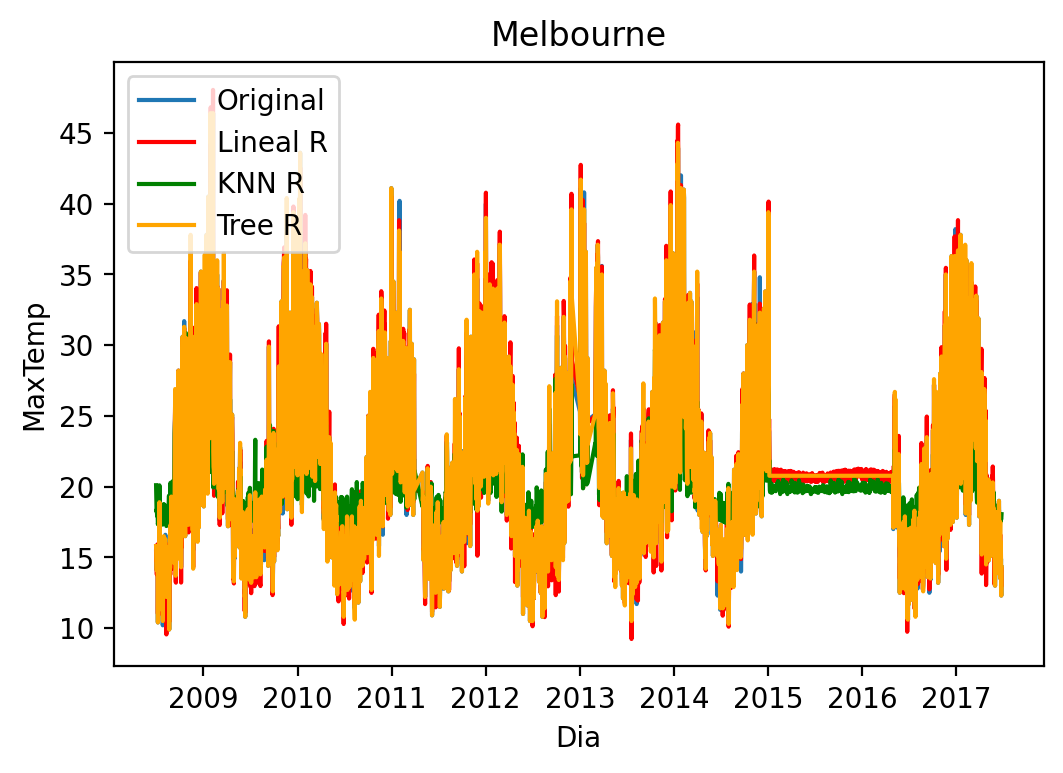

In [169]:
plt.figure(dpi=200)
plt.plot(Melbourne['Date'],Melbourne['MaxTemp'], markerfacecolor="#ff0000", label="Original")
plt.plot(Melbourne['Date'],lin_reg.predict(X),color='r', markerfacecolor="#ff0000", label="Lineal R")
plt.plot(Melbourne['Date'],knn.predict(scaler.transform(X)),color='g', markerfacecolor="#ff0000",label= "KNN R")
plt.plot(Melbourne['Date'],regressor.predict(X),color='orange', markerfacecolor="#ff0000",label= "Tree R")
plt.xlabel('Dia')
plt.ylabel('MaxTemp')
plt.title('Melbourne')
plt.legend(loc="upper left")
plt.show()

Recuerda
la data se divide en 3
la gran parte para hacer el entrenamiento
una pequeña parte para hacer la optimización (X_val,y_val)
la otra pequeña parte para hacer las metricas (X_test,y_test)